In [1]:
!pip3 install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'x')

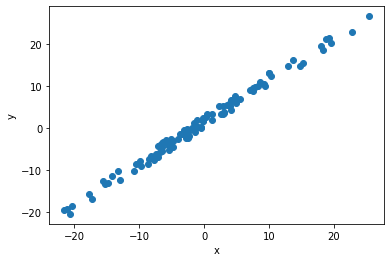

In [3]:
X = torch.randn(100, 1) * 10
y = X + 3 * torch.rand(100, 1)
plt.plot(X.numpy(), y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('x')

In [4]:
class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  
  def forward(self, x):
    pred = self.linear(x)
    return pred

In [5]:
torch.manual_seed(1)
model = LR(1, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [6]:
'''
x = torch.tensor([[1.0], [2.0]])
print(model.forward(x))
'''

'\nx = torch.tensor([[1.0], [2.0]])\nprint(model.forward(x))\n'

In [7]:
[w, b] = model.parameters()
# print(w, b)
# w1 = w[0][0].item()
# b1 = b[0].item()
# print(w1, b1)
def get_params():
  return (w[0][0].item(), b[0].item())

In [8]:
def plot_fit(title):
  plt.title = title
  
  w1, b1 = get_params()
  x1 = np.array([-30, 30])
  y1 = w1 * x1 + b1
  plt.plot(x1, y1, 'r')
  plt.scatter(X, y)
  plt.show()

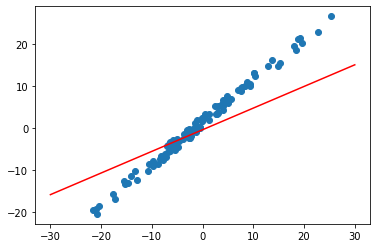

In [9]:
plot_fit('initial Model')

In [10]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-4) # stochastic gradient descent

In [11]:
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(X)
  loss = criterion(y_pred, y)
  print('epoch: ', i, ', loss: ', loss.item())

  losses.append(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch:  0 , loss:  25.905384063720703
epoch:  1 , loss:  25.07387924194336
epoch:  2 , loss:  24.274822235107422
epoch:  3 , loss:  23.506946563720703
epoch:  4 , loss:  22.769033432006836
epoch:  5 , loss:  22.059911727905273
epoch:  6 , loss:  21.37845230102539
epoch:  7 , loss:  20.723581314086914
epoch:  8 , loss:  20.094253540039062
epoch:  9 , loss:  19.489469528198242
epoch:  10 , loss:  18.908273696899414
epoch:  11 , loss:  18.34973907470703
epoch:  12 , loss:  17.81298065185547
epoch:  13 , loss:  17.297155380249023
epoch:  14 , loss:  16.801433563232422
epoch:  15 , loss:  16.325035095214844
epoch:  16 , loss:  15.867199897766113
epoch:  17 , loss:  15.427209854125977
epoch:  18 , loss:  15.004364967346191
epoch:  19 , loss:  14.597989082336426
epoch:  20 , loss:  14.20744514465332
epoch:  21 , loss:  13.832108497619629
epoch:  22 , loss:  13.47138786315918
epoch:  23 , loss:  13.124711036682129
epoch:  24 , loss:  12.791528701782227
epoch:  25 , loss:  12.471317291259766
ep

Text(0.5, 0, 'epoch')

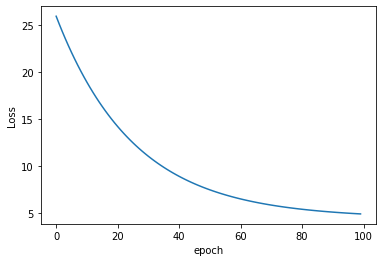

In [12]:
plt.plot(range(epochs), [l.detach() for l in losses])
plt.ylabel('Loss')
plt.xlabel('epoch')

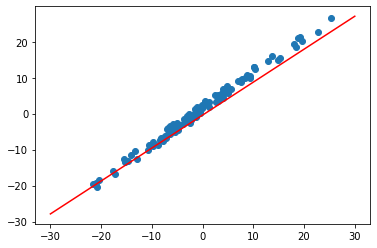

In [13]:
plot_fit('Trained Model')